# Simple wave table

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

### I will build the table with a wave samled at 1hz for one second 

In [174]:
#trusty waveGen
#simplified for sine-only generation
class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):

		#start = timer() #reduce function!!! functools
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega

		return self.volume * np.imag(self.buffer).astype(np.float32)

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()

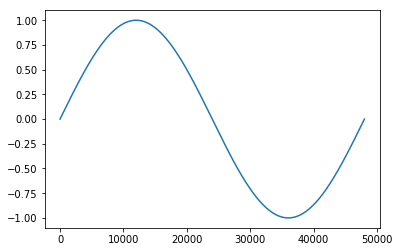

In [175]:
length = 48000
freq = 1
Gen = waveGen(freq, length, 'sine', 1)
wave = Gen.nextFrame()
plt.plot(wave)
plt.show()

## A class to read the table:


In [176]:
class table_Reader:
    def __init__(self, Table, Pitch = 440, FrameSize = 0):
        self.table = Table
        self.tableLen = len(self.table) 
        self.pitch = Pitch
        self.table_index = 0
        self.frameSize = FrameSize
        return
    
    def nextFrame(self, size):
        self.frameSize = size
        return self.take_frame()
        
    def update_pitch(self, val):
        self.pitch = val
        return
    
    def take_frame(self):
        
        output = np.empty(self.frameSize)
        
        for i in range(self.frameSize):
            self.table_index += self.pitch  
            
            if self.table_index >= len(self.table):
                self.table_index -= self.tableLen
            
            output[i] = self.table[self.table_index]
         
        return output
            
            

## Some tests

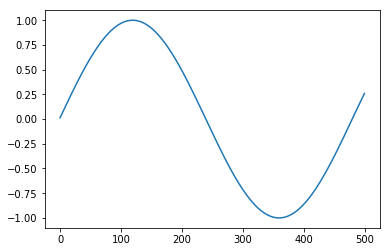

In [177]:
frameSize = 500
freq = 100
reader = table_Reader(wave, freq)
output_wave = reader.nextFrame(frameSize)

plt.plot(output_wave)
plt.show()

## Lets add a few together to check that there is no clipping between frames

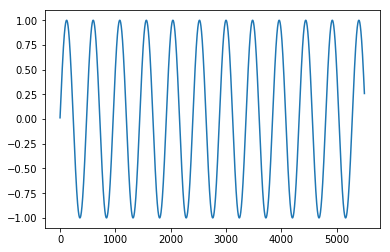

In [178]:
for i in range(10):
    output_wave = np.append(output_wave, reader.nextFrame(frameSize))

plt.plot(output_wave)
plt.show()   

# The last test of the wave table will show pitch variations 

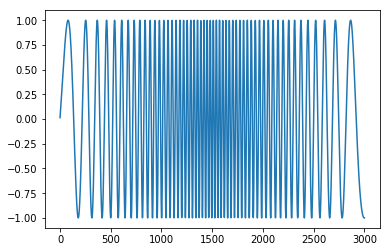

In [179]:
frameSize = 1
freq = 110
reader = table_Reader(wave, freq)
output_wave = reader.nextFrame(frameSize)

for i in range(1500):
    freq += 1
    reader.update_pitch(freq)
    output_wave = np.append(output_wave, reader.nextFrame(frameSize))
    
for i in range(1500):
    freq -= 1
    reader.update_pitch(freq)
    output_wave = np.append(output_wave, reader.nextFrame(frameSize))
    
plt.plot(output_wave)

plt.show()

### This seems to work fairly will
##### Which i very satifying for an hours work
##### why didnt i do this before?